In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nba = pd.read_csv('/Users/elorm/Documents/Repos/Datasets/nba_games.csv')

In [3]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

In [4]:
print(nba_2010.head())
print('')
print(nba_2014.head())

            game_id  year_id  fran_id      opp_fran game_location  \
21717  200910270CLE     2010  Celtics     Cavaliers             A   
21718  200910280BOS     2010  Celtics       Hornets             H   
21719  200910280MIA     2010   Knicks          Heat             A   
21720  200910280MIN     2010     Nets  Timberwolves             A   
21721  200910280OKC     2010  Thunder         Kings             H   

       is_playoffs  pts  opp_pts game_result  forecast  point_diff  
21717            0   95       89           W  0.277472           6  
21718            0   92       59           W  0.814619          33  
21719            0   93      115           L  0.258755         -22  
21720            0   93       95           L  0.475155          -2  
21721            0  102       89           W  0.716764          13  

            game_id  year_id  fran_id   opp_fran game_location  is_playoffs  \
23468  201310300CLE     2014     Nets  Cavaliers             A            0   
23469  20131

Suppose you want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.

In [5]:
#Points earned by Knicks in 2010
knicks_pnts = nba_2010[nba_2010['fran_id'] == 'Knicks']['pts']
#Points earned by Nets 2010
nets_pnts = nba_2010[nba_2010['fran_id'] == 'Nets']['pts']

In [6]:
#Calculating mean difference
knicks_pnts_mean = np.mean(knicks_pnts)
print('Average point obtained by knicks:', knicks_pnts_mean)
nets_pnts_mean = np.mean(nets_pnts)
print('Average points obtained by nets:', nets_pnts_mean)

diff_means_2010 = nets_pnts_mean - knicks_pnts_mean
print('Difference in means:', diff_means_2010)

Average point obtained by knicks: 102.10975609756098
Average points obtained by nets: 92.3780487804878
Difference in means: -9.731707317073173


The difference in means suggests the two variables may be associated.

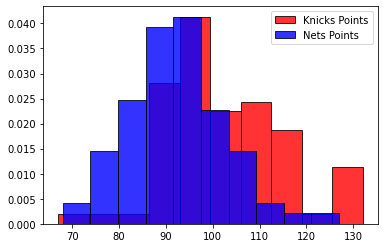

In [7]:
plt.hist(knicks_pnts, color = 'red', alpha = 0.8, density = True, label = 'Knicks Points', edgecolor = 'black')
plt.hist(nets_pnts, color = 'blue', alpha = 0.8, density = True, label = 'Nets Points', edgecolor = 'black')
plt.legend()
plt.show()

In [8]:
#Points earned by Knicks in 2014
knicks_pnts_2014 = nba_2014[nba_2014['fran_id'] == 'Knicks']['pts']
#Points earned by Nets 2014
nets_pnts_2014 = nba_2014[nba_2014['fran_id'] == 'Nets']['pts']

In [9]:
#Calculating mean difference
knicks_pnts_mean = np.mean(knicks_pnts_2014)
print('Average point obtained by knicks:', knicks_pnts_mean)
nets_pnts_mean = np.mean(nets_pnts_2014)
print('Average points obtained by nets:', nets_pnts_mean)

diff_means_2014 = nets_pnts_mean - knicks_pnts_mean
print('Difference in means:', diff_means_2014)

Average point obtained by knicks: 98.58536585365853
Average points obtained by nets: 98.13829787234043
Difference in means: -0.44706798131809933


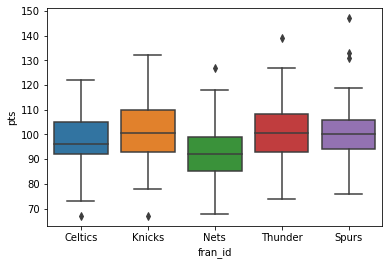

In [10]:
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.show()

The variable game_result indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable game_location indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). Do teams tend to win more games at home compared to away?

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of game_result and game_location.

In [11]:
# Frequency table for wins anf losses at home or away
location_result_freq = pd.crosstab(nba_2010['game_result'], nba_2010['game_location'])
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


In [12]:
#Table of proportions
location_result_proportions = location_result_freq/len(nba_2010)
print(location_result_proportions)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


In [13]:
#calculating the expected contingency and chi square statistic
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print('')
print('Chi-squared statistic:',chi2)

[[119. 119.]
 [106. 106.]]

Chi-squared statistic: 6.501704455367053


From the chi-squared statistic which is 6, means the variables are associated

For each game, 538 has calculated the probability that each team will win the game. In the data, this is saved as forecast. The point_diff column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). Did teams with a higher probability of winning (according to 538) also tend to win games by more points?

Using nba_2010, calculate the covariance between forecast (538’s projected win probability) and point_diff (the margin of victory/defeat) in the dataset. Save and print your result. Looking at the matrix, what is the covariance between these two variables?

In [14]:
#Calculating covariance
cov_mat = np.cov(nba_2010['forecast'], nba_2010['point_diff'])
print(cov_mat)

cov = cov_mat[0,1]
print(cov)

[[5.22668307e-02 1.37461257e+00]
 [1.37461257e+00 1.86559287e+02]]
1.3746125676458796


0.44020887084680815


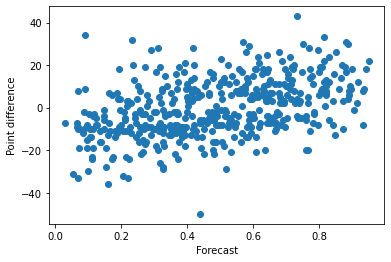

In [15]:
#Exploring correlation
corr, p = pearsonr(nba_2010['forecast'], nba_2010['point_diff'])
print(corr)


plt.scatter(data = nba_2010, x = 'forecast', y = 'point_diff')
plt.xlabel('Forecast')
plt.ylabel('Point difference')
plt.show()


In [16]:
# plt.scatter(data = nba, x = 'forecast', y = 'point_diff')
# plt.xlabel('Forecast')
# plt.ylabel('Point difference')
# plt.show()